# Recurrent Neural Network

In [1]:
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(torch.__version__))

# Device Configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("This notebook use [%s]."%(device))

PyTorch version:[1.7.0].
This notebook use [cuda:0].


# Set hyper-parameter

In [2]:
EPOCHS = 100
LATENT_SIZE = 100
BATCH_SIZE = 128
LEARNING_RATE = 0.001

# Prepare dataset

In [3]:
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5], std=[0.5])])
# MNIST dataset
mnist_train = datasets.MNIST(root='./data/', train=True, transform=transform, download=True)
mnist_test = datasets.MNIST(root='./data/', train=False, transform=transform, download=True)

train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)

print("Preparing dataset done!")

Preparing dataset done!


# Defining Model

In [4]:
# our model
class Model(nn.Module):
    def __init__(self, input_dim=784, hidden_dims=[128, 256], latent_dim=100):
        super(Model, self).__init__()

        encoder_layers = []
        prev_dim = input_dim
        for dim in hidden_dims:
            encoder_layers.append(nn.Linear(prev_dim, dim))
            encoder_layers.append(nn.ReLU(True))
            prev_dim = dim
        self.encoder = nn.Sequential(*encoder_layers)    

        self.mu = nn.Linear(prev_dim, latent_dim)
        self.logvar = nn.Linear(prev_dim, latent_dim)

        decoder_layers = []
        prev_dim = latent_dim
        for dim in hidden_dims[::-1]:
            decoder_layers.append(nn.Linear(prev_dim, dim))
            decoder_layers.append(nn.ReLU(True))
            prev_dim = dim
        decoder_layers.append(nn.Linear(prev_dim, input_dim))
        decoder_layers.append(nn.Sigmoid())
        self.decoder = nn.Sequential(*decoder_layers)
        
    def encode(self, x):
        out = self.encoder(x)
        return self.mu(out), self.logvar(out)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decoder(z), mu, logvar

model = Model().to(device)

optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

def criterion(recon_x, x, mu, logvar):
    bce_loss = F.binary_cross_entropy(recon_x, x, reduction='sum')

    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return bce_loss + kl_loss

# Define help function

In [5]:
def plot_generator(num = 64):
    z = torch.randn(num, 100).to(device)
    
    test_g = model.decoder(z)
    plt.figure(figsize=(8, 6))
    for i in range(num):
        plt.subplot(8, 8, i+1)
        plt.imshow(test_g[i].view(28, 28).data.cpu().numpy(), cmap=plt.cm.gray)
        plt.axis('off')
    plt.show()

# Train model 

Start training !
Epoch: 1, Loss: -52589.5
Epoch: 2, Loss: -28686.36328125
Epoch: 3, Loss: -19592.826171875
Epoch: 4, Loss: -14978.216796875
Epoch: 5, Loss: -12094.99609375


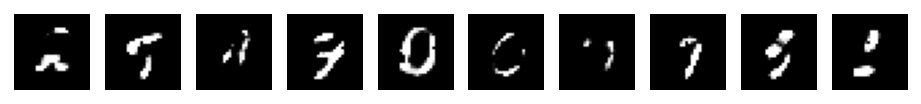

Epoch: 6, Loss: -10131.048828125
Epoch: 7, Loss: -8710.6220703125
Epoch: 8, Loss: -7640.37451171875
Epoch: 9, Loss: -6804.25146484375
Epoch: 10, Loss: -6131.78271484375


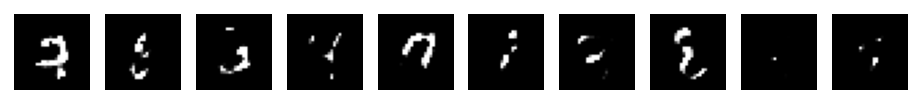

Epoch: 11, Loss: -5580.0078125
Epoch: 12, Loss: -5118.25341796875
Epoch: 13, Loss: -4727.22265625
Epoch: 14, Loss: -4391.57421875
Epoch: 15, Loss: -4100.12548828125


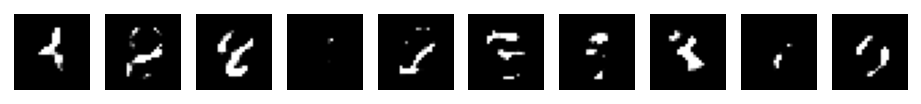

Epoch: 16, Loss: -3845.526123046875
Epoch: 17, Loss: -3619.42822265625
Epoch: 18, Loss: -3419.369140625
Epoch: 19, Loss: -3239.68115234375
Epoch: 20, Loss: -3077.52880859375


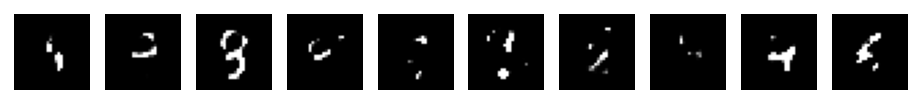

Epoch: 21, Loss: -2930.79296875
Epoch: 22, Loss: -2797.55029296875
Epoch: 23, Loss: -2675.676513671875
Epoch: 24, Loss: -2563.8359375
Epoch: 25, Loss: -2461.358154296875


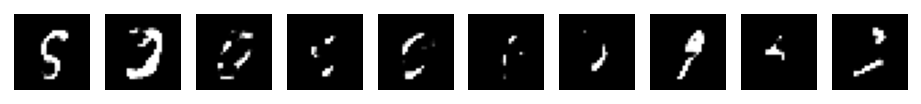

Epoch: 26, Loss: -2366.69091796875
Epoch: 27, Loss: -2278.260498046875
Epoch: 28, Loss: -2196.5
Epoch: 29, Loss: -2120.130859375
Epoch: 30, Loss: -2049.15087890625


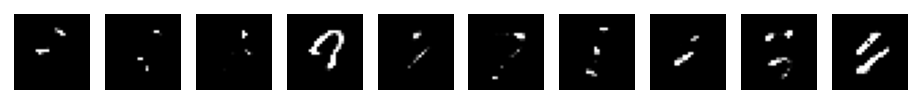

Epoch: 31, Loss: -1982.8475341796875
Epoch: 32, Loss: -1921.8385009765625
Epoch: 33, Loss: -1864.654541015625
Epoch: 34, Loss: -1809.9127197265625
Epoch: 35, Loss: -1757.6644287109375


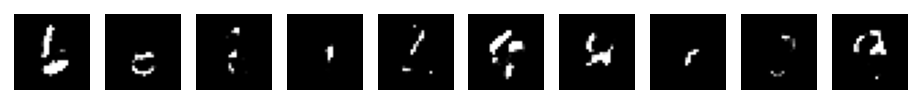

Epoch: 36, Loss: -1709.42919921875
Epoch: 37, Loss: -1663.2816162109375
Epoch: 38, Loss: -1619.9364013671875
Epoch: 39, Loss: -1578.4014892578125
Epoch: 40, Loss: -1539.49169921875


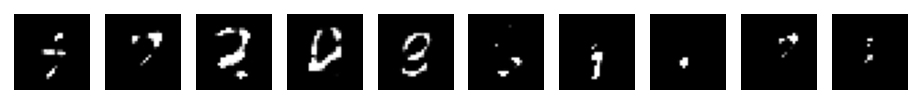

Epoch: 41, Loss: -1502.3701171875
Epoch: 42, Loss: -1466.5831298828125
Epoch: 43, Loss: -1432.23486328125
Epoch: 44, Loss: -1400.068359375
Epoch: 45, Loss: -1369.580322265625


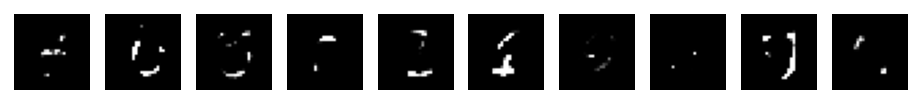

Epoch: 46, Loss: -1340.914794921875
Epoch: 47, Loss: -1312.1214599609375
Epoch: 48, Loss: -1284.579833984375
Epoch: 49, Loss: -1258.8350830078125
Epoch: 50, Loss: -1233.63671875


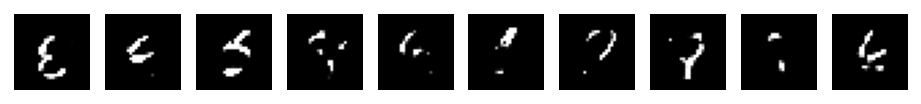

Epoch: 51, Loss: -1209.5400390625
Epoch: 52, Loss: -1186.3546142578125
Epoch: 53, Loss: -1163.572509765625
Epoch: 54, Loss: -1142.309326171875
Epoch: 55, Loss: -1121.564208984375


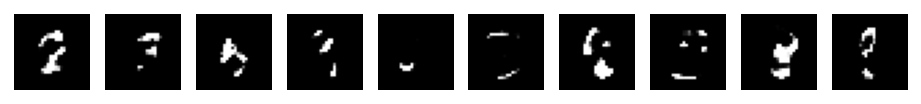

Epoch: 56, Loss: -1101.3585205078125
Epoch: 57, Loss: -1082.0579833984375
Epoch: 58, Loss: -1063.6431884765625
Epoch: 59, Loss: -1045.7584228515625
Epoch: 60, Loss: -1028.2994384765625


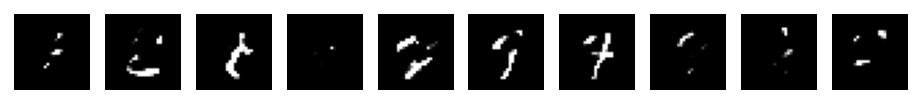

Epoch: 61, Loss: -1011.4832763671875
Epoch: 62, Loss: -995.085693359375
Epoch: 63, Loss: -979.3751831054688
Epoch: 64, Loss: -963.7787475585938
Epoch: 65, Loss: -948.913330078125


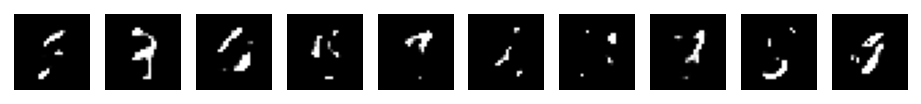

Epoch: 66, Loss: -934.5717163085938
Epoch: 67, Loss: -920.706298828125
Epoch: 68, Loss: -907.3472290039062
Epoch: 69, Loss: -893.9071044921875
Epoch: 70, Loss: -880.9688720703125


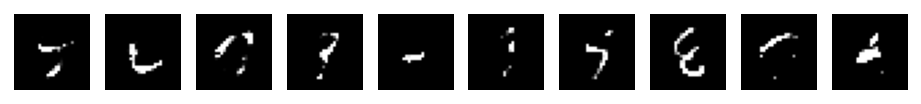

Epoch: 71, Loss: -868.7603149414062
Epoch: 72, Loss: -856.5209350585938
Epoch: 73, Loss: -845.1854248046875
Epoch: 74, Loss: -833.6270141601562
Epoch: 75, Loss: -822.4789428710938


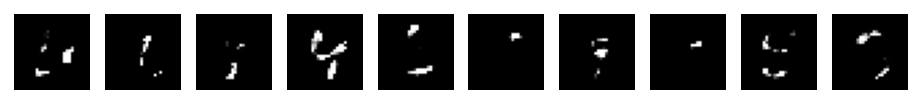

Epoch: 76, Loss: -811.85498046875
Epoch: 77, Loss: -801.2838134765625
Epoch: 78, Loss: -790.9234619140625


KeyboardInterrupt: 

In [6]:
# Training Phase
print_every = 1
plot_every = 5
print("Start training !")
total = 0
# Training loop
for epoch in range(EPOCHS):
    loss_val_sum = 0
    for batch_img, _ in train_iter:

        X = batch_img.view(batch_img.size(0), -1).to(device)
        
        x_recon, mu, logvar = model(X)
        
        # Training Discriminator
        loss = criterion(x_recon, X, mu, logvar)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total += X.size(0)
        loss_val_sum+= loss
        
    if (((epoch+1)%print_every)==0) or ((epoch+1)==(EPOCHS-1)):
            print(f"Epoch: {epoch+1}, Loss: {loss_val_sum/total}")
    if (((epoch+1)%plot_every)==0) or ((epoch+1)==(EPOCHS-1)):
        plot_generator(num = 10)
print("Training Done !")